In [2]:
import pandas as pd
import numpy as np

# Load Data
file_path = 'mini_modified.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=["Timestamp", "Score"], errors="ignore")

# Fill missing values
data = data.fillna(data.median())

# Rename columns for easier handling
data.columns = [f"Q{i+1}" for i in range(len(data.columns))]

# Section-wise Feature Engineering (Equal Weights)
data['Academic'] = data[['Q1', 'Q2', 'Q3', 'Q4',"Q5"]].mean(axis=1)
data['Facilities'] = data[['Q6', 'Q7', 'Q8', 'Q9', 'Q10']].mean(axis=1)
data['Social_Life'] = data[['Q10', 'Q11', 'Q12', 'Q13']].mean(axis=1)
data['Future_Outlook'] = data[['Q14', 'Q15', 'Q16']].mean(axis=1)
data['Health'] = data[['Q17', 'Q18', 'Q19', 'Q20']].mean(axis=1)
data['Extracurricular'] = data[['Q21', 'Q22', 'Q23', 'Q24', 'Q25']].mean(axis=1)
data['Finance'] = data[['Q26', 'Q27', 'Q28', 'Q29', 'Q30']].mean(axis=1)

data['GDP'] = data[['Q31', 'Q32']].mean(axis=1)
data['Social Support'] = data[['Q34', 'Q33']].mean(axis=1)
data['Healthy Life Expectancy'] = data[['Q36', 'Q35']].mean(axis=1)
data['Freedom'] = data[['Q38', 'Q37']].mean(axis=1)
data['Generosity'] = data[['Q40', 'Q39']].mean(axis=1)
data['Corruption'] = data[['Q42', 'Q41']].mean(axis=1)

# View the data with new features
print(data.head())

   Q1  Q2   Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  ...  Future_Outlook  Health  \
0   6   6  6.0   6   6   6   6   6   6    6  ...        6.000000    6.00   
1   6   4  5.0   5   4   7   6   6   7    7  ...        4.666667    4.75   
2   3   3  3.0   5   7   8   8   8   7    9  ...        5.000000    4.25   
3   3   1  3.0   2   4   4   8   8   6    9  ...        6.666667    3.00   
4   2   1  2.0   2   1   2   2   1   1    2  ...        2.333333    1.50   

   Extracurricular  Finance  GDP  Social Support  Healthy Life Expectancy  \
0              6.0      6.0  1.0             1.0                      6.0   
1              3.8      5.0  1.0             1.0                      5.0   
2              8.2      5.6  3.0             1.0                      5.5   
3              3.8      3.2  3.5             1.0                      1.0   
4              1.6      1.0  1.0             1.0                      1.0   

   Freedom  Generosity  Corruption  
0      3.5         1.0         2.5  
1     

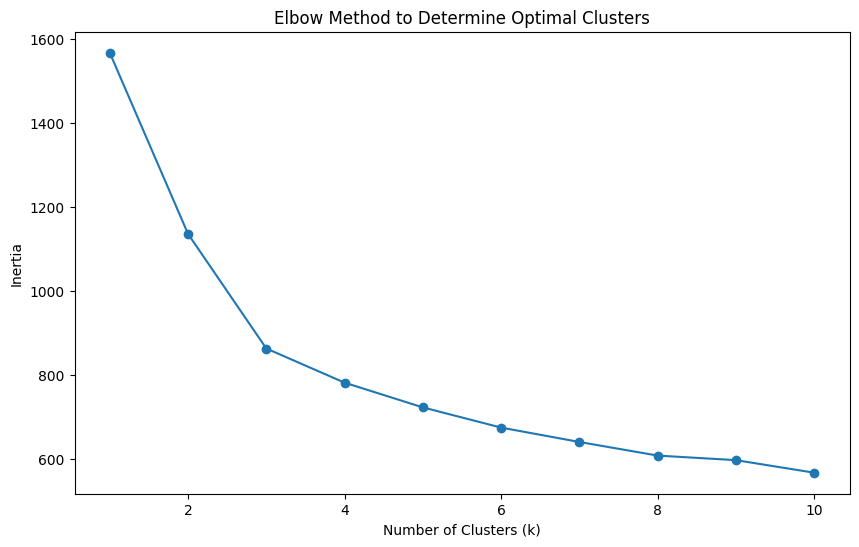

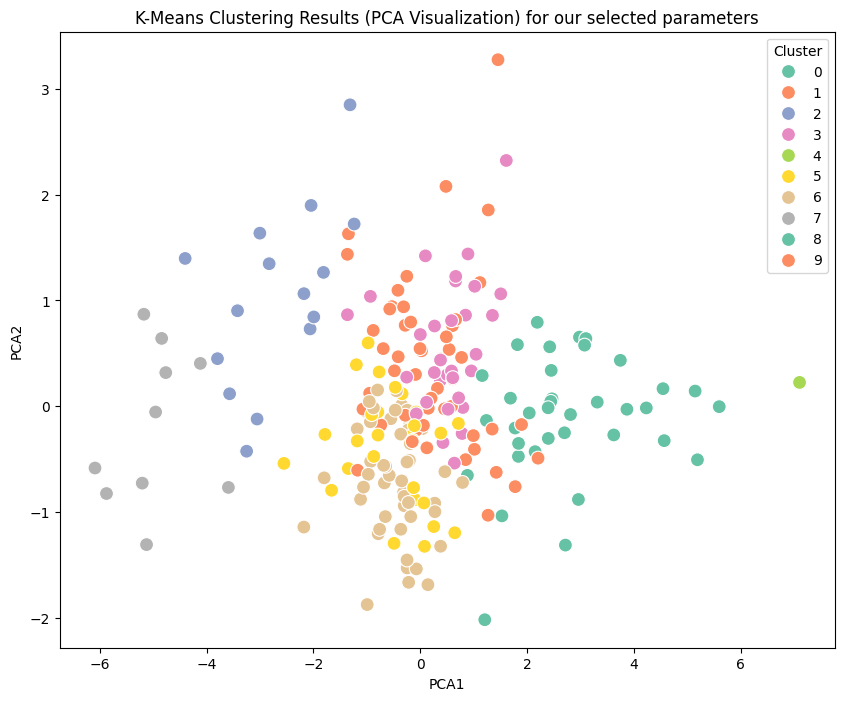

Clustered data saved as 'clustered_happiness_data.csv'


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = ['Finance', 'Health', 'Extracurricular', 'Academic',
            'Facilities', 'Social_Life', 'Future_Outlook',]
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means with optimal k (e.g., 3 clusters based on Elbow Method)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title("K-Means Clustering Results (PCA Visualization) for our selected parameters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# Save the clustered data
data.to_csv('clustered_happiness_data.csv', index=False)
print("Clustered data saved as 'clustered_happiness_data.csv'")


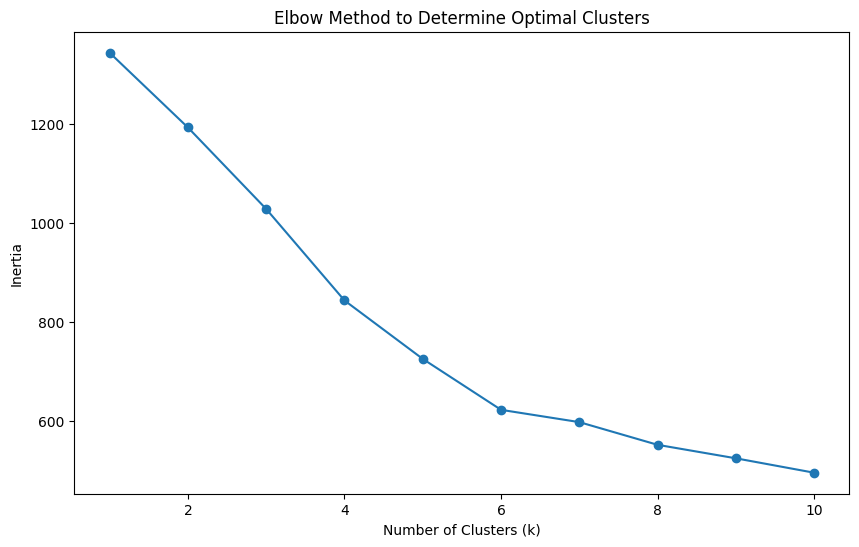

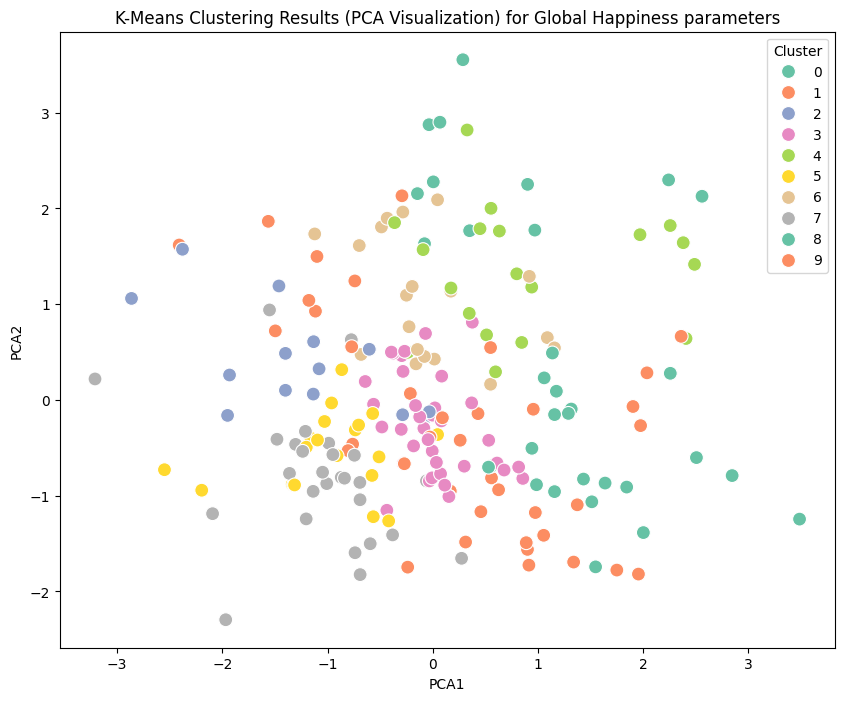

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering
features = ['GDP', 'Social Support', 'Healthy Life Expectancy', 'Freedom', 'Generosity', 'Corruption']
X = data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method to Determine Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Apply K-Means with optimal k (e.g., 3 clusters based on Elbow Method)
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters using PCA (2D projection)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title("K-Means Clustering Results (PCA Visualization) for Global Happiness parameters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()


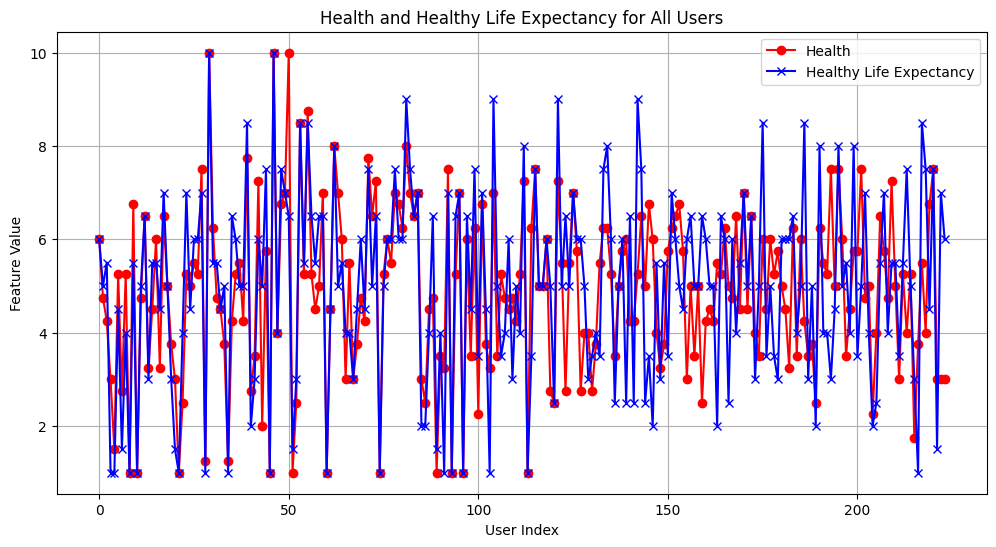

In [7]:
# Plotting Health and Healthy Life Expectancy for all users
plt.figure(figsize=(12, 6))

# Plot Health
plt.plot(data.index, data['Health'], label='Health', linestyle='-', marker='o', color='red')

# Plot Healthy Life Expectancy
plt.plot(data.index, data['Healthy Life Expectancy'], label='Healthy Life Expectancy', linestyle='-', marker='x', color='blue')

# Adding titles and labels
plt.title('Health and Healthy Life Expectancy for All Users')
plt.xlabel('User Index')
plt.ylabel('Feature Value')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

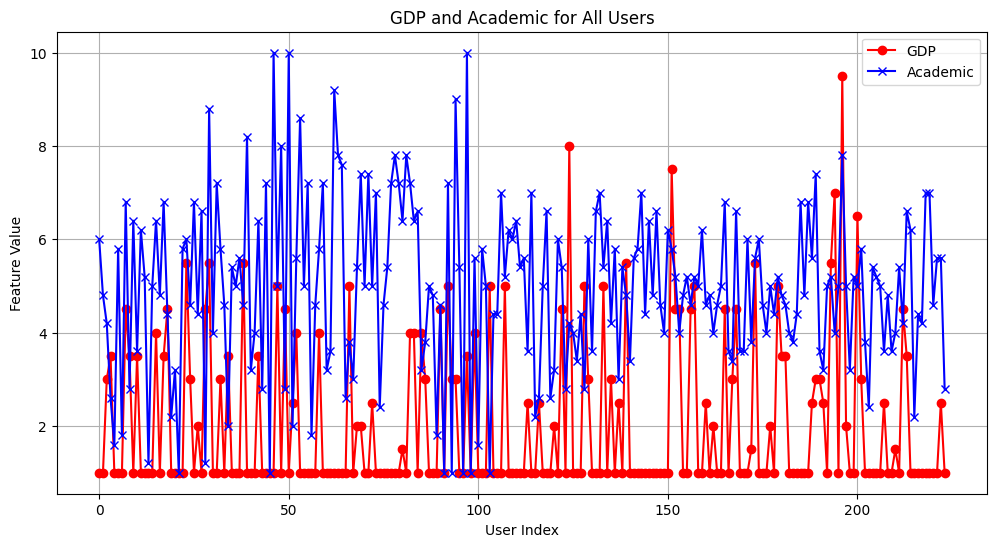

In [8]:
# Plotting GDP and Academic for all users
plt.figure(figsize=(12, 6))

# Plot GDP
plt.plot(data.index, data['GDP'], label='GDP', linestyle='-', marker='o', color='red')

# Plot Academic
plt.plot(data.index, data['Academic'], label='Academic', linestyle='-', marker='x', color='blue')

# Adding titles and labels
plt.title('GDP and Academic for All Users')
plt.xlabel('User Index')
plt.ylabel('Feature Value')
plt.legend()
plt.grid(True)

# Show plot
plt.show()